In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [10]:
fifa = pd.read_csv("./complete.csv")
#fifa = pd.read_csv("../input/complete.csv")
fifa = fifa.rename(columns={'age': 'position'})

In [11]:
cb = pd.DataFrame(fifa.loc[(fifa["prefers_cb"]==True)])
cb['position'] = 0

wb = pd.DataFrame(fifa.loc[(fifa["prefers_rb"]==True)|(fifa["prefers_lb"]==True)|(fifa["prefers_rwb"]==True)|(fifa["prefers_lwb"]==True)])
wb['position'] = 1

mid = pd.DataFrame(fifa.loc[(fifa["prefers_cdm"]==True)|(fifa["prefers_cm"]==True)|(fifa["prefers_cam"]==True)])
mid['position'] = 2

wingers = pd.DataFrame(fifa.loc[(fifa["prefers_lm"]==True)|(fifa["prefers_rm"]==True)|(fifa["prefers_lw"]==True)|(fifa["prefers_rw"]==True)])
wingers['position'] = 3

st = pd.DataFrame(fifa.loc[(fifa["prefers_st"]==True)|(fifa["prefers_cf"]==True)])
st['position'] = 4

data = [cb,wb,st,mid, wingers]
result = pd.concat(data)
result = result.sort_values('overall', ascending=False)
result = result.drop_duplicates('name')
position_fifa = result.loc[:,["name","club_logo","flag","photo" ,"acceleration",
                       "sprint_speed", "positioning","finishing","shot_power",
                       "long_shots","volleys","penalties","vision","crossing",
                       "free_kick_accuracy","short_passing","long_passing","curve",
                       "agility","balance","reactions","ball_control","dribbling",
                       "composure","interceptions","heading_accuracy","marking",
                       "standing_tackle","sliding_tackle","jumping","stamina",
                       "strength","aggression", "position"]]
position_data = position_fifa.iloc[:, 4:33]
position_labels = position_fifa["position"]

In [14]:
position_rnd_clf = RandomForestClassifier(n_estimators = 250, min_samples_split = 10,min_samples_leaf = 5, max_depth=7)
position_rnd_clf.fit(position_data, position_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
overall_fifa=pd.read_csv('./complete.csv')
overall_labels = overall_fifa["overall"]
overall_data = overall_fifa.loc[:,["acceleration","sprint_speed", "positioning",
                                   "finishing","shot_power","long_shots","volleys",
                                   "penalties","vision","crossing","free_kick_accuracy",
                                   "short_passing","long_passing","curve","agility",
                                   "balance","reactions","ball_control","dribbling",
                                   "composure","interceptions","heading_accuracy","marking",
                                   "standing_tackle","sliding_tackle","jumping","stamina","strength","aggression"]]


In [13]:
overall_rnd_clf = RandomForestRegressor(n_estimators = 100, max_depth=30, min_samples_leaf=2, min_samples_split=2)
overall_rnd_clf.fit(overall_data, overall_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

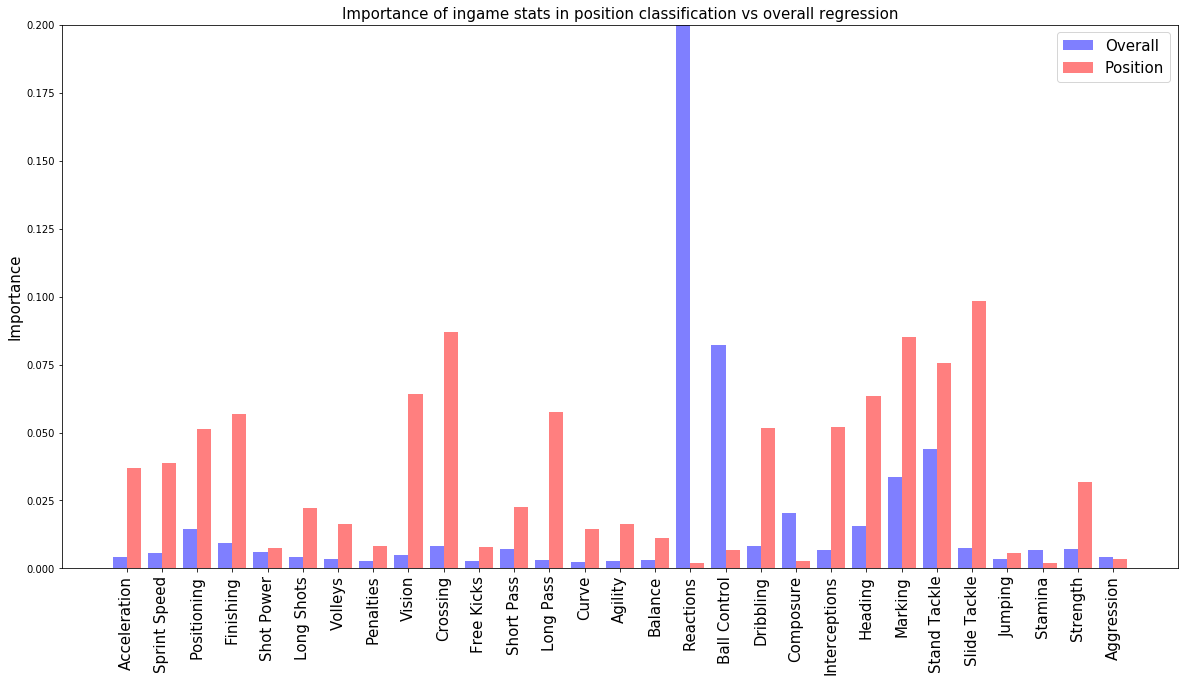

In [17]:
labels=('Acceleration', 'Sprint Speed','Positioning','Finishing','Shot Power','Long Shots','Volleys','Penalties','Vision','Crossing','Free Kicks', 'Short Pass','Long Pass','Curve',"Agility",'Balance','Reactions','Ball Control','Dribbling','Composure','Interceptions','Heading','Marking','Stand Tackle','Slide Tackle','Jumping','Stamina','Strength','Aggression')
pos = np.arange(len(labels))
width = .4 
fig, ax = plt.subplots(figsize=(20, 10))
#sub plot for the overall regression feature importances
overall = ax.bar(pos, overall_rnd_clf.feature_importances_, width, align='center', alpha=0.5, color = 'Blue')
#sub plot for the position classification feature importances
position = ax.bar(pos+width, position_rnd_clf.feature_importances_, width, align='center', alpha=0.5, color = 'Red')

ax.set_xticks(pos + width / 2)
ax.set_xticklabels(labels,rotation=90, fontsize=15)
#The highest feature for the regression makes the rest of the data hard to see, so scale it
ax.set_ylim([0,.2])
ax.legend((overall[0],position[0]), ('Overall','Position'),fontsize=15)
ax.set_ylabel('Importance',fontsize=15)
ax.set_title('Importance of ingame stats in position classification vs overall regression',fontsize=15)
plt.show()
